Instructions

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

***NOTE***

TO CONVERT THE XLSX From CSV - https://cloudconvert.com/xls-to-csv

### **Red Wine Analysis By Rajnandan Singh**

In [ ]:
# Importing the necessary packages/modules and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/1788410-1767134-1729261-1613779-Red_wine__(1).csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0


### **We can then use the columns attribute of the Pandas library to get to know more about what columns are present in the dataset.**

In [ ]:
df.columns
df.max(skipna = True, numeric_only = True)

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        3.90000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [ ]:
print("The maximum rating for quality is ", df['quality'].max())

The maximum rating for quality is  8.0


### **We can then use the correlation matrix to find out which attributes of the dataset affect the quality i.e., the response vector more.**

Text(0.5, 1.0, 'Heatmap of correlation coefficients for each attribute')

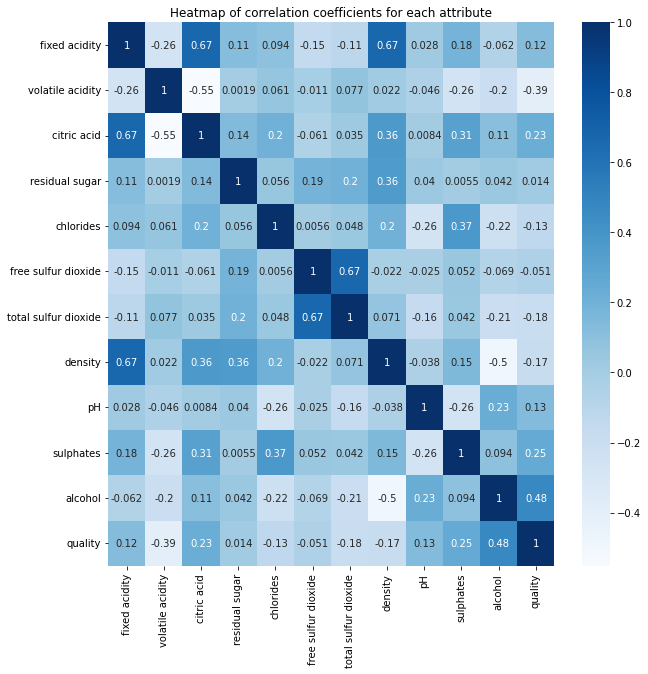

In [ ]:
mat = df.corr() #creates a correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(mat,cmap = 'Blues',annot = True) #creates a heatmap for that matrix
plt.title("Heatmap of correlation coefficients for each attribute")

### **Dropping redundant columns and imputing missing values**

In [ ]:
#Attribute selection and a check for missing values
data = df.drop(['residual sugar','free sulfur dioxide'],axis = 1)
print(data.columns)
print(data.isnull().sum())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [ ]:
# Imputing the missing values using the forward fill method
data = data.fillna(method = 'ffill')
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

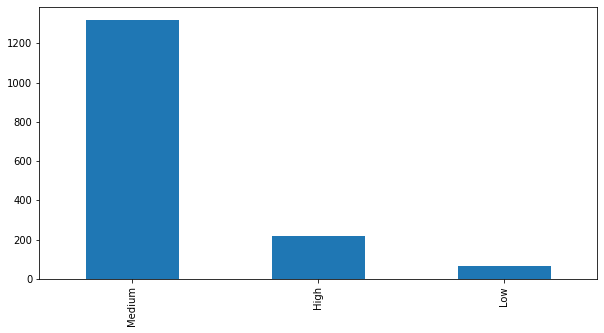

In [ ]:
# Creating classes and dividing the data at hand into those classes
rating = []
for value in data['quality']:
    if value in range(3,5):    rating.append('Low')
    elif value in range(4,7):  rating.append('Medium')
    elif value > 6  : rating.append('High')
data['rating'] = rating
data.rating.value_counts().plot(kind = 'bar',figsize = (10,5))

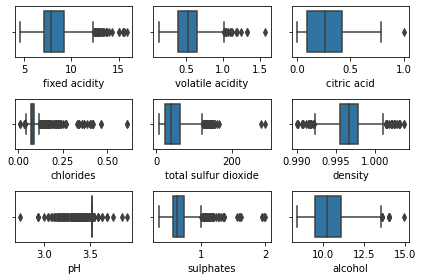

In [ ]:
# Checking for outliers
# import matplotlib.pyplot as plt
plt.subplot(3,3,1)
sns.boxplot(x = data['fixed acidity'])

plt.subplot(3,3,2)
sns.boxplot(x = data['volatile acidity'])

plt.subplot(3,3,3)
sns.boxplot(x = data['citric acid'])

plt.subplot(3,3,4)
sns.boxplot(x = data['chlorides'])

plt.subplot(3,3,5)
sns.boxplot(x = data['total sulfur dioxide'])

plt.subplot(3,3,6)
sns.boxplot(x = data['density'])

plt.subplot(3,3,7)
sns.boxplot(x = data.pH)

plt.subplot(3,3,8)
sns.boxplot(x = data.sulphates)

plt.subplot(3,3,9)
sns.boxplot(x = data.alcohol)

plt.tight_layout()

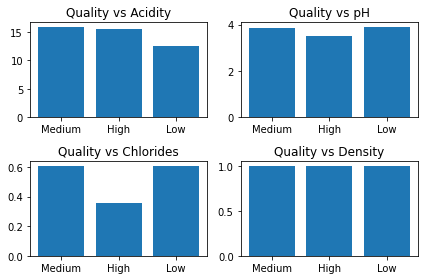

In [ ]:
# Demonstration of the relationships of the attributes with most outliers with the target variable
plt.subplot(2,2,1)
plt.bar(data.rating,data['fixed acidity'])
plt.title('Quality vs Acidity')

plt.subplot(2,2,2)
plt.bar(data.rating,data.pH)
plt.title('Quality vs pH')

plt.subplot(2,2,3)
plt.bar(data.rating, data.chlorides)
plt.title('Quality vs Chlorides')

plt.subplot(2,2,4)
plt.bar(data.rating, data.density)
plt.title('Quality vs Density')

plt.tight_layout()

### **As you can see, the quality of the wine isn't affected that much with pH and Density. But it varies when it comes to Acidity and Chlorides. Another notable point is that the alcohol level also has an impact pn the quality of the wine as it could be seen below.**

Text(0.5, 1.0, 'Quality vs Alcohol levels')

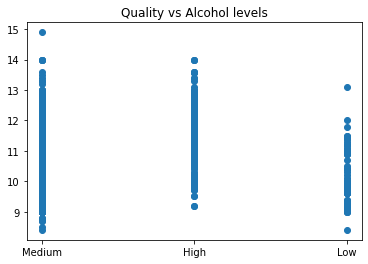

In [ ]:
plt.scatter(data['rating'],data['alcohol'])
plt.title('Quality vs Alcohol levels')

### **Building Regression and Classification Models and comparing the model scores**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Y = data.quality
features = ['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
X = data[features]
X.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,0.069,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,0.065,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,0.073,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,0.071,18.0,0.9978,3.35,0.80,10.5


### **Splitting the data using the train_test_split() class from the model_selection module:**

In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,random_state = 80)
dt_model = DecisionTreeRegressor(max_leaf_nodes = 100, random_state = 1)
dt_model.fit(train_X,train_Y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [ ]:
dt_predictions  = dt_model.predict(val_X)
dt_mae = mean_absolute_error(dt_predictions, val_Y)
print('The model score is',dt_model.score(val_X,val_Y))

The model score is 0.1002592349927035


### **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,random_state = 9)
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X,train_Y)

RandomForestRegressor(random_state=1)

In [ ]:
rf_predictions  = rf_model.predict(val_X)
rf_mae = mean_absolute_error(rf_predictions, val_Y)
# print(rf_mae)
print('The model score is',rf_model.score(val_X,val_Y))

The model score is 0.4548408443625397


### **Decision Tree based Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclf_model = DecisionTreeClassifier()
dtclf_model.fit(train_X,train_Y)
print('The model score id',dtclf_model.score(val_X,val_Y))

The model score id 0.6225


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc_model=RandomForestClassifier()
rfc_model.fit(train_X,train_Y)
print('The model score id',rfc_model.score(val_X,val_Y))

The model score id 0.7


**As one can see, the classification model has given us the highest score. So, it is ideal to go with the Classifier to predict the quality of the wine as it is clearly more of a classification problem than a regression problem.**

thank-you-placard-concept-illustration_114360-13436.avif